In [1]:
%matplotlib inline

In [2]:
import gc
import pathlib
import sys

In [3]:
import joblib
import lightgbm as lgb
import pandas as pd

In [4]:
root_dir_path = pathlib.Path("..")
data_dir_path = root_dir_path / "data"
processed_dir_path = data_dir_path / "processed"
train_path = processed_dir_path / "train.parquet"
models_dir_path = root_dir_path / "models"
model_path = models_dir_path / "model.joblib"
src_dir_path = root_dir_path / "src"

In [5]:
sys.path.append(str(src_dir_path))

In [6]:
from package.constants import *

In [7]:
train = pd.read_parquet(train_path)

In [8]:
is_train = train["date"] < "2016-03-28"
is_valid = train["date"] >= "2016-03-28"

In [9]:
X = train.loc[is_train, features]
X_valid = train.loc[is_valid, features]
y = train.loc[is_train, "demand"]
y_valid = train.loc[is_valid, "demand"]

In [10]:
del train
del is_train
del is_valid

In [11]:
gc.collect()

80

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44474062 entries, 0 to 44474061
Data columns (total 25 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   store_id                         int8   
 1   item_id                          int16  
 2   dept_id                          int8   
 3   cat_id                           int8   
 4   state_id                         int8   
 5   event_name_1                     int8   
 6   event_type_1                     int8   
 7   event_name_2                     int8   
 8   event_type_2                     int8   
 9   snap_CA                          int8   
 10  snap_TX                          int8   
 11  snap_WI                          int8   
 12  sell_price                       float32
 13  year                             int16  
 14  weekofyear                       int8   
 15  quarter                          int8   
 16  month                            int8   
 17  day   

In [13]:
X_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 853720 entries, 44474062 to 45327781
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   store_id                         853720 non-null  int8   
 1   item_id                          853720 non-null  int16  
 2   dept_id                          853720 non-null  int8   
 3   cat_id                           853720 non-null  int8   
 4   state_id                         853720 non-null  int8   
 5   event_name_1                     853720 non-null  int8   
 6   event_type_1                     853720 non-null  int8   
 7   event_name_2                     853720 non-null  int8   
 8   event_type_2                     853720 non-null  int8   
 9   snap_CA                          853720 non-null  int8   
 10  snap_TX                          853720 non-null  int8   
 11  snap_WI                          853720 non-null  int8  

In [14]:
model = lgb.LGBMRegressor(
    importance_type="gain", learning_rate=0.05, n_estimators=1_000, random_state=0
)

In [15]:
%%time
model.fit(
    X,
    y,
    categorical_feature=categorical_features,
    early_stopping_rounds=100,
    eval_metric="rmse",
    eval_set=[(X, y), (X_valid, y_valid)],
)

/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['cat_id', 'dept_id', 'event_name_1', 'event_name_2', 'event_type_1', 'event_type_2', 'item_id', 'state_id', 'store_id']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	training's rmse: 4.16954	training's l2: 17.3851	valid_1's rmse: 3.47795	valid_1's l2: 12.0962
Training until validation scores don't improve for 100 rounds
[2]	training's rmse: 4.04656	training's l2: 16.3747	valid_1's rmse: 3.36966	valid_1's l2: 11.3546
[3]	training's rmse: 3.93195	training's l2: 15.4602	valid_1's rmse: 3.26824	valid_1's l2: 10.6814
[4]	training's rmse: 3.82532	training's l2: 14.6331	valid_1's rmse: 3.17473	valid_1's l2: 10.0789
[5]	training's rmse: 3.72609	training's l2: 13.8837	valid_1's rmse: 3.0865	valid_1's l2: 9.52649
[6]	training's rmse: 3.63396	training's l2: 13.2057	valid_1's rmse: 3.00552	valid_1's l2: 9.03316
[7]	training's rmse: 3.54799	training's l2: 12.5883	valid_1's rmse: 2.93003	valid_1's l2: 8.58509
[8]	training's rmse: 3.46827	training's l2: 12.0289	valid_1's rmse: 2.85999	valid_1's l2: 8.17953
[9]	training's rmse: 3.39455	training's l2: 11.523	valid_1's rmse: 2.79429	valid_1's l2: 7.80807
[10]	training's rmse: 3.32625	training's l2: 11.0639	valid

[84]	training's rmse: 2.48225	training's l2: 6.16159	valid_1's rmse: 2.02426	valid_1's l2: 4.09761
[85]	training's rmse: 2.48116	training's l2: 6.15618	valid_1's rmse: 2.02329	valid_1's l2: 4.0937
[86]	training's rmse: 2.4801	training's l2: 6.15087	valid_1's rmse: 2.02313	valid_1's l2: 4.09307
[87]	training's rmse: 2.47938	training's l2: 6.14733	valid_1's rmse: 2.02284	valid_1's l2: 4.09187
[88]	training's rmse: 2.47815	training's l2: 6.14122	valid_1's rmse: 2.02241	valid_1's l2: 4.09015
[89]	training's rmse: 2.47723	training's l2: 6.13666	valid_1's rmse: 2.0223	valid_1's l2: 4.08971
[90]	training's rmse: 2.47611	training's l2: 6.13114	valid_1's rmse: 2.02199	valid_1's l2: 4.08846
[91]	training's rmse: 2.47538	training's l2: 6.1275	valid_1's rmse: 2.02138	valid_1's l2: 4.08599
[92]	training's rmse: 2.47415	training's l2: 6.12144	valid_1's rmse: 2.02118	valid_1's l2: 4.08519
[93]	training's rmse: 2.47315	training's l2: 6.11646	valid_1's rmse: 2.02085	valid_1's l2: 4.08385
[94]	training'

[167]	training's rmse: 2.43328	training's l2: 5.92084	valid_1's rmse: 2.01127	valid_1's l2: 4.04522
[168]	training's rmse: 2.43308	training's l2: 5.91986	valid_1's rmse: 2.01126	valid_1's l2: 4.04516
[169]	training's rmse: 2.4327	training's l2: 5.91804	valid_1's rmse: 2.01117	valid_1's l2: 4.04481
[170]	training's rmse: 2.43239	training's l2: 5.9165	valid_1's rmse: 2.01122	valid_1's l2: 4.045
[171]	training's rmse: 2.43185	training's l2: 5.9139	valid_1's rmse: 2.01114	valid_1's l2: 4.04467
[172]	training's rmse: 2.43153	training's l2: 5.91234	valid_1's rmse: 2.01114	valid_1's l2: 4.04467
[173]	training's rmse: 2.43124	training's l2: 5.91094	valid_1's rmse: 2.01103	valid_1's l2: 4.04425
[174]	training's rmse: 2.43081	training's l2: 5.90885	valid_1's rmse: 2.01059	valid_1's l2: 4.04246
[175]	training's rmse: 2.43041	training's l2: 5.90688	valid_1's rmse: 2.01042	valid_1's l2: 4.04177
[176]	training's rmse: 2.43005	training's l2: 5.90516	valid_1's rmse: 2.01037	valid_1's l2: 4.0416
[177]	

[250]	training's rmse: 2.40772	training's l2: 5.7971	valid_1's rmse: 2.0079	valid_1's l2: 4.03168
[251]	training's rmse: 2.40755	training's l2: 5.7963	valid_1's rmse: 2.00801	valid_1's l2: 4.03211
[252]	training's rmse: 2.40731	training's l2: 5.79512	valid_1's rmse: 2.0079	valid_1's l2: 4.03166
[253]	training's rmse: 2.40708	training's l2: 5.79404	valid_1's rmse: 2.00782	valid_1's l2: 4.03133
[254]	training's rmse: 2.40693	training's l2: 5.7933	valid_1's rmse: 2.00781	valid_1's l2: 4.03131
[255]	training's rmse: 2.40672	training's l2: 5.79228	valid_1's rmse: 2.0078	valid_1's l2: 4.03128
[256]	training's rmse: 2.40637	training's l2: 5.79064	valid_1's rmse: 2.00783	valid_1's l2: 4.03139
[257]	training's rmse: 2.40617	training's l2: 5.78968	valid_1's rmse: 2.00783	valid_1's l2: 4.03139
[258]	training's rmse: 2.40589	training's l2: 5.78828	valid_1's rmse: 2.00785	valid_1's l2: 4.03147
[259]	training's rmse: 2.4057	training's l2: 5.78741	valid_1's rmse: 2.00785	valid_1's l2: 4.03146
[260]	t

[333]	training's rmse: 2.38973	training's l2: 5.71079	valid_1's rmse: 2.00584	valid_1's l2: 4.02339
[334]	training's rmse: 2.38953	training's l2: 5.70986	valid_1's rmse: 2.00585	valid_1's l2: 4.02343
[335]	training's rmse: 2.3893	training's l2: 5.70877	valid_1's rmse: 2.00586	valid_1's l2: 4.02346
[336]	training's rmse: 2.38918	training's l2: 5.70816	valid_1's rmse: 2.00594	valid_1's l2: 4.0238
[337]	training's rmse: 2.38893	training's l2: 5.70697	valid_1's rmse: 2.00595	valid_1's l2: 4.02384
[338]	training's rmse: 2.38859	training's l2: 5.70536	valid_1's rmse: 2.00596	valid_1's l2: 4.02386
[339]	training's rmse: 2.3884	training's l2: 5.70444	valid_1's rmse: 2.00592	valid_1's l2: 4.02373
[340]	training's rmse: 2.38828	training's l2: 5.70387	valid_1's rmse: 2.006	valid_1's l2: 4.02404
[341]	training's rmse: 2.38799	training's l2: 5.7025	valid_1's rmse: 2.00596	valid_1's l2: 4.02386
[342]	training's rmse: 2.38774	training's l2: 5.70129	valid_1's rmse: 2.00594	valid_1's l2: 4.02381
[343]	

[416]	training's rmse: 2.3758	training's l2: 5.64441	valid_1's rmse: 2.00507	valid_1's l2: 4.02029
[417]	training's rmse: 2.37563	training's l2: 5.64363	valid_1's rmse: 2.00504	valid_1's l2: 4.02018
[418]	training's rmse: 2.37555	training's l2: 5.64322	valid_1's rmse: 2.00507	valid_1's l2: 4.02029
[419]	training's rmse: 2.37538	training's l2: 5.64244	valid_1's rmse: 2.00508	valid_1's l2: 4.02033
[420]	training's rmse: 2.37528	training's l2: 5.64193	valid_1's rmse: 2.00502	valid_1's l2: 4.02012
[421]	training's rmse: 2.37519	training's l2: 5.64154	valid_1's rmse: 2.00496	valid_1's l2: 4.01988
[422]	training's rmse: 2.37511	training's l2: 5.64113	valid_1's rmse: 2.00498	valid_1's l2: 4.01993
[423]	training's rmse: 2.37504	training's l2: 5.6408	valid_1's rmse: 2.00488	valid_1's l2: 4.01955
[424]	training's rmse: 2.37486	training's l2: 5.63995	valid_1's rmse: 2.00491	valid_1's l2: 4.01968
[425]	training's rmse: 2.3747	training's l2: 5.63919	valid_1's rmse: 2.00484	valid_1's l2: 4.01938
[42

[499]	training's rmse: 2.36444	training's l2: 5.59058	valid_1's rmse: 2.00431	valid_1's l2: 4.01726
[500]	training's rmse: 2.36428	training's l2: 5.58982	valid_1's rmse: 2.00417	valid_1's l2: 4.01672
[501]	training's rmse: 2.36414	training's l2: 5.58914	valid_1's rmse: 2.00406	valid_1's l2: 4.01627
[502]	training's rmse: 2.36398	training's l2: 5.58841	valid_1's rmse: 2.00412	valid_1's l2: 4.01648
[503]	training's rmse: 2.36389	training's l2: 5.58795	valid_1's rmse: 2.00412	valid_1's l2: 4.01649
[504]	training's rmse: 2.36377	training's l2: 5.58742	valid_1's rmse: 2.00409	valid_1's l2: 4.01638
[505]	training's rmse: 2.3636	training's l2: 5.58661	valid_1's rmse: 2.00407	valid_1's l2: 4.01629
[506]	training's rmse: 2.36347	training's l2: 5.58597	valid_1's rmse: 2.00406	valid_1's l2: 4.01626
[507]	training's rmse: 2.36342	training's l2: 5.58574	valid_1's rmse: 2.00406	valid_1's l2: 4.01625
[508]	training's rmse: 2.36328	training's l2: 5.58508	valid_1's rmse: 2.00411	valid_1's l2: 4.01644
[

[582]	training's rmse: 2.35448	training's l2: 5.54357	valid_1's rmse: 2.00357	valid_1's l2: 4.01427
[583]	training's rmse: 2.35436	training's l2: 5.543	valid_1's rmse: 2.00355	valid_1's l2: 4.0142
[584]	training's rmse: 2.35431	training's l2: 5.54279	valid_1's rmse: 2.00356	valid_1's l2: 4.01424
[585]	training's rmse: 2.35419	training's l2: 5.5422	valid_1's rmse: 2.00353	valid_1's l2: 4.01415
[586]	training's rmse: 2.35411	training's l2: 5.54185	valid_1's rmse: 2.00356	valid_1's l2: 4.01423
[587]	training's rmse: 2.35405	training's l2: 5.54154	valid_1's rmse: 2.00355	valid_1's l2: 4.0142
[588]	training's rmse: 2.35388	training's l2: 5.54073	valid_1's rmse: 2.00355	valid_1's l2: 4.01419
[589]	training's rmse: 2.35372	training's l2: 5.53998	valid_1's rmse: 2.00356	valid_1's l2: 4.01425
[590]	training's rmse: 2.35362	training's l2: 5.53951	valid_1's rmse: 2.00356	valid_1's l2: 4.01424
[591]	training's rmse: 2.35347	training's l2: 5.53884	valid_1's rmse: 2.00352	valid_1's l2: 4.01411
[592]

[665]	training's rmse: 2.34584	training's l2: 5.50296	valid_1's rmse: 2.00287	valid_1's l2: 4.01148
[666]	training's rmse: 2.34573	training's l2: 5.50247	valid_1's rmse: 2.00286	valid_1's l2: 4.01145
[667]	training's rmse: 2.34565	training's l2: 5.50207	valid_1's rmse: 2.00285	valid_1's l2: 4.0114
[668]	training's rmse: 2.34555	training's l2: 5.50163	valid_1's rmse: 2.00277	valid_1's l2: 4.0111
[669]	training's rmse: 2.34546	training's l2: 5.5012	valid_1's rmse: 2.00274	valid_1's l2: 4.01095
[670]	training's rmse: 2.34537	training's l2: 5.50075	valid_1's rmse: 2.00273	valid_1's l2: 4.01092
[671]	training's rmse: 2.34522	training's l2: 5.50008	valid_1's rmse: 2.00278	valid_1's l2: 4.01115
[672]	training's rmse: 2.34514	training's l2: 5.49966	valid_1's rmse: 2.00274	valid_1's l2: 4.01098
[673]	training's rmse: 2.34475	training's l2: 5.49785	valid_1's rmse: 2.0027	valid_1's l2: 4.01082
[674]	training's rmse: 2.34466	training's l2: 5.49741	valid_1's rmse: 2.0027	valid_1's l2: 4.0108
[675]	

[748]	training's rmse: 2.33767	training's l2: 5.46471	valid_1's rmse: 2.00215	valid_1's l2: 4.00862
[749]	training's rmse: 2.3376	training's l2: 5.46437	valid_1's rmse: 2.00211	valid_1's l2: 4.00846
[750]	training's rmse: 2.33754	training's l2: 5.46411	valid_1's rmse: 2.00212	valid_1's l2: 4.00847
[751]	training's rmse: 2.33748	training's l2: 5.46381	valid_1's rmse: 2.00208	valid_1's l2: 4.00832
[752]	training's rmse: 2.33743	training's l2: 5.46358	valid_1's rmse: 2.00205	valid_1's l2: 4.00819
[753]	training's rmse: 2.33737	training's l2: 5.46331	valid_1's rmse: 2.00205	valid_1's l2: 4.0082
[754]	training's rmse: 2.33733	training's l2: 5.46309	valid_1's rmse: 2.00201	valid_1's l2: 4.00803
[755]	training's rmse: 2.33724	training's l2: 5.46269	valid_1's rmse: 2.002	valid_1's l2: 4.008
[756]	training's rmse: 2.33719	training's l2: 5.46244	valid_1's rmse: 2.002	valid_1's l2: 4.008
[757]	training's rmse: 2.33711	training's l2: 5.4621	valid_1's rmse: 2.00203	valid_1's l2: 4.00812
[758]	train

[831]	training's rmse: 2.33093	training's l2: 5.43326	valid_1's rmse: 2.00139	valid_1's l2: 4.00556
[832]	training's rmse: 2.33085	training's l2: 5.43288	valid_1's rmse: 2.00144	valid_1's l2: 4.00578
[833]	training's rmse: 2.3308	training's l2: 5.43265	valid_1's rmse: 2.00144	valid_1's l2: 4.00577
[834]	training's rmse: 2.33074	training's l2: 5.43236	valid_1's rmse: 2.00142	valid_1's l2: 4.0057
[835]	training's rmse: 2.33068	training's l2: 5.43207	valid_1's rmse: 2.00143	valid_1's l2: 4.0057
[836]	training's rmse: 2.33062	training's l2: 5.43181	valid_1's rmse: 2.00141	valid_1's l2: 4.00563
[837]	training's rmse: 2.33057	training's l2: 5.43157	valid_1's rmse: 2.00139	valid_1's l2: 4.00556
[838]	training's rmse: 2.33045	training's l2: 5.431	valid_1's rmse: 2.0014	valid_1's l2: 4.00559
[839]	training's rmse: 2.33042	training's l2: 5.43084	valid_1's rmse: 2.00141	valid_1's l2: 4.00563
[840]	training's rmse: 2.33034	training's l2: 5.43048	valid_1's rmse: 2.00135	valid_1's l2: 4.00542
[841]	

[914]	training's rmse: 2.32484	training's l2: 5.40488	valid_1's rmse: 2.00164	valid_1's l2: 4.00656
[915]	training's rmse: 2.32477	training's l2: 5.40455	valid_1's rmse: 2.00165	valid_1's l2: 4.00659
[916]	training's rmse: 2.32466	training's l2: 5.40404	valid_1's rmse: 2.00165	valid_1's l2: 4.00661
[917]	training's rmse: 2.32462	training's l2: 5.40387	valid_1's rmse: 2.00164	valid_1's l2: 4.00656
[918]	training's rmse: 2.32441	training's l2: 5.40287	valid_1's rmse: 2.00163	valid_1's l2: 4.00653
[919]	training's rmse: 2.32432	training's l2: 5.40246	valid_1's rmse: 2.0016	valid_1's l2: 4.00641
[920]	training's rmse: 2.32424	training's l2: 5.40208	valid_1's rmse: 2.00168	valid_1's l2: 4.00672
[921]	training's rmse: 2.32417	training's l2: 5.40177	valid_1's rmse: 2.00172	valid_1's l2: 4.00686
[922]	training's rmse: 2.32408	training's l2: 5.40136	valid_1's rmse: 2.00163	valid_1's l2: 4.0065
[923]	training's rmse: 2.32403	training's l2: 5.40114	valid_1's rmse: 2.00165	valid_1's l2: 4.0066
[92

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='gain', learning_rate=0.05, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=1000, n_jobs=-1, num_leaves=31, objective=None,
              random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

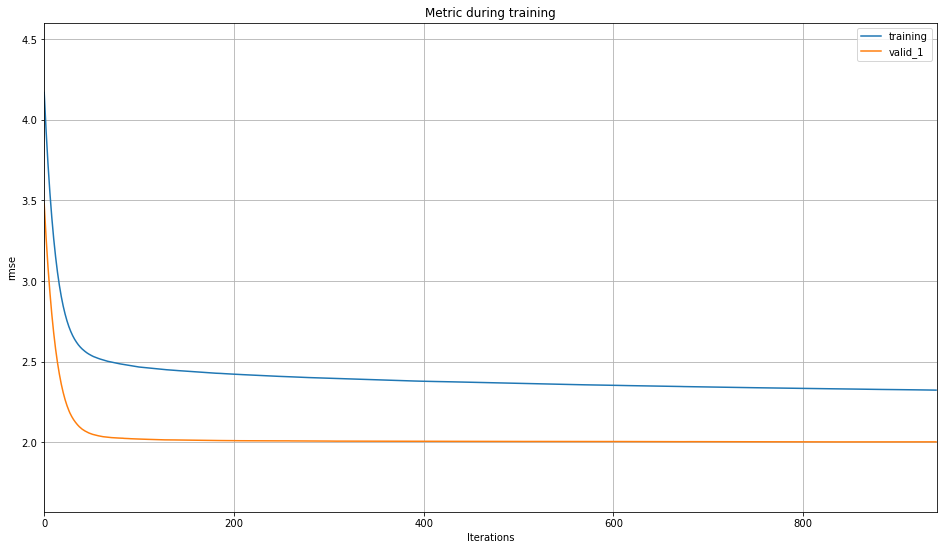

In [16]:
ax = lgb.plot_metric(model, metric="rmse", figsize=(16, 9))

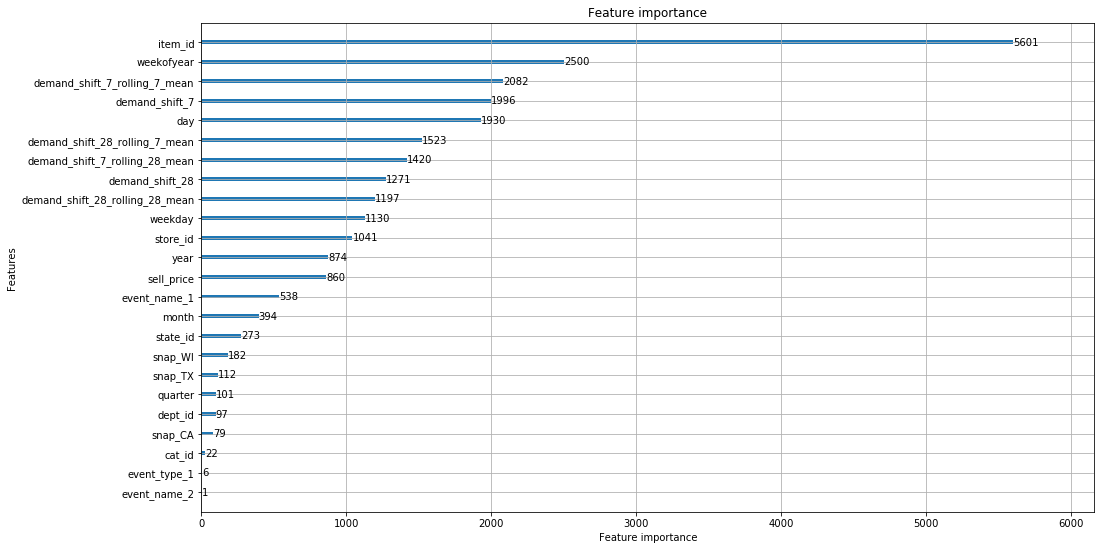

In [17]:
ax = lgb.plot_importance(model, figsize=(16, 9))

In [18]:
joblib.dump(model, model_path)

['../models/model.joblib']